In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
rent=pd.read_csv("Desktop\Hrent.csv")
rent.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [4]:
rent.isnull().sum()

LotArea      0
SalePrice    0
dtype: int64

In [82]:
X=rent.loc[:,['LotArea']]
y=rent.SalePrice

In [83]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=1000)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model=LinearRegression()

In [86]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1060, 1)
X_test shape (266, 1)
y_train shape (1060,)
y_test shape (266,)


In [87]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_predict=model.predict(X_test)

In [89]:
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics

In [90]:
r2_score(y_test,y_predict)

0.18496573835931907

In [91]:
y_test

1098    200000
1061    194000
873     272000
1134    186500
1189    179200
         ...  
1159    162000
890     110000
625     141000
1236    189000
1103    113000
Name: SalePrice, Length: 266, dtype: int64

In [92]:
y_predict

array([168006.22364381, 216518.03679912, 189367.4492599 , 161028.5917317 ,
       154313.48458459, 172731.66941399, 160600.26185194, 181581.51741342,
       151612.24292357, 159301.45511979, 158783.31413621, 146347.93053047,
       190161.93210138, 195571.32396988, 184524.55820011, 172324.06517358,
       202410.78495304, 180849.21148997, 152772.87872677, 153601.90430049,
       150679.58915314, 220752.97577152, 190673.16453851, 173104.73092217,
       168455.27916291, 157332.51938221, 154140.7709234 , 161028.5917317 ,
       157332.51938221, 146347.93053047, 177104.77931535, 171135.79518459,
       178472.67151198, 189477.98600307, 163425.85734903, 153670.98976496,
       173153.0907473 , 159591.61407059, 171218.69774196, 202935.83448306,
       146347.93053047, 160165.02342574, 196669.78285506, 177643.64593826,
       116503.00987667, 150493.05839905, 165215.17087896, 173982.11632102,
       166375.80668217, 171564.12506434, 154997.43068291, 183426.09931494,
       178666.11081251, 1

In [93]:
sample=rent.head(10)

In [94]:
sample

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000
5,14115,143000
6,10084,307000
7,10382,200000
8,6120,129900
9,7420,118000


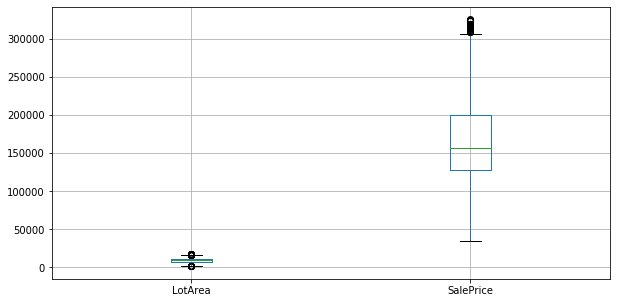

In [102]:
rent.boxplot(figsize=(10,5))

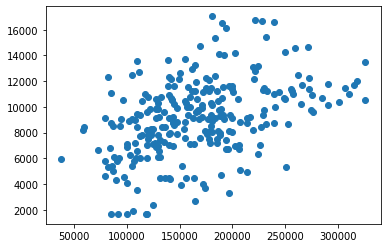

In [103]:
plt.scatter(y_test,X_test)

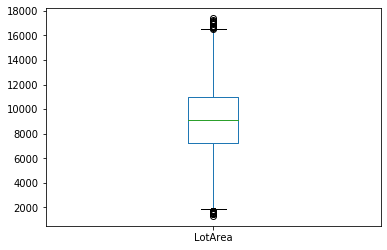

In [104]:
rent.LotArea.plot(kind="box")

In [105]:
rent[rent.LotArea==rent.LotArea.max()]

,LotArea,SalePrice
1302,17400,160000


In [155]:
rent[rent.LotArea==rent.LotArea.min()]

,LotArea,SalePrice
868,1300,124000


In [156]:
q1=rent.LotArea.quantile(0.25)

In [157]:
q1

7253.75

In [158]:
q3=rent.LotArea.quantile(0.75)

In [159]:
q3

10963.5

In [160]:
IQR=q3-q1

In [161]:
IQR

3709.75

In [162]:
minarea=q1-1.5*IQR
maxarea=q3+1.5*IQR

In [163]:
print(minarea)
print(maxarea)

1689.125
16528.125


In [186]:
index = rent[(rent['LotArea'] >= maxarea)|(rent['LotArea'] <= minarea)].index
rent.drop(index, inplace=True)
rent['LotArea'].describe()

count     1294.000000
mean      9083.908810
std       2920.896116
min       1869.000000
25%       7388.500000
50%       9132.500000
75%      10899.000000
max      16492.000000
Name: LotArea, dtype: float64

In [187]:
rent_out = rent[~((rent < (q1 - 1.5 * IQR)) |(rent > (q3 + 1.5 * IQR))).any(axis=1)]
print(rent_out.shape)

(0, 2)


In [189]:
rent.describe()

,LotArea,SalePrice
count,1294.000000,1294.000000
mean,9083.908810,168033.784389
std,2920.896116,56931.999558
min,1869.000000,34900.000000
25%,7388.500000,128600.000000
50%,9132.500000,157000.000000
75%,10899.000000,200000.000000
max,16492.000000,326000.000000


In [190]:
X=rent.loc[:,['LotArea']]
y=rent.SalePrice

In [191]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1000)

In [192]:
model=LinearRegression()

In [193]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
y_predict=model.predict(X_test)

In [197]:
r2_score(y_test,y_predict)

0.17528635146642957

In [198]:
y_test

967     167900
681     217000
642     102776
465     202665
411     204000
         ...  
112     320000
35      145000
107     180000
715     187500
1188    147000
Name: SalePrice, Length: 259, dtype: int64

In [199]:
y_predict

array([171452.69068652, 167883.48755767, 164314.28442882, 151236.2882315 ,
       168339.85513331, 145841.61480011, 165540.34657232, 172992.07982225,
       171854.56661134, 160315.95954974, 167978.84794661, 152775.67736723,
       136108.043672  , 145841.61480011, 172406.29457591, 172270.06544885,
       198255.77143467, 144574.68391849, 172542.52370297, 153565.80630415,
       153089.00435946, 170049.53067785, 166957.12949369, 162189.11004676,
       190170.57274393, 191069.6849825 , 192159.51799894, 149928.48861177,
       149928.48861177, 177337.78897531, 131687.40849905, 183304.62474034,
       160315.95954974, 165833.23919549, 182242.03754931, 151031.94454092,
       159123.95468801, 122989.17873657, 202104.24427398, 158102.23623509,
       205653.01303378, 155479.82553928, 160281.90226798, 173135.12040566,
       157761.66341746, 178536.6052934 , 194373.24131359, 167910.73338308,
       135181.68560802, 117703.48860682, 173809.45458458, 162529.68286439,
       163169.95976155, 1

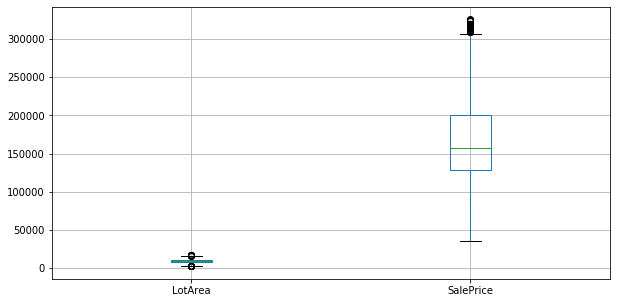

In [200]:
rent.boxplot(figsize=(10,5))

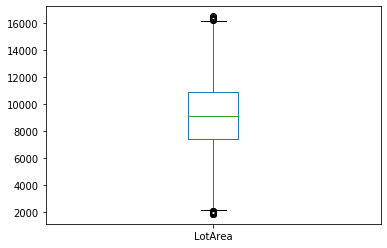

In [201]:
rent.LotArea.plot(kind="box")

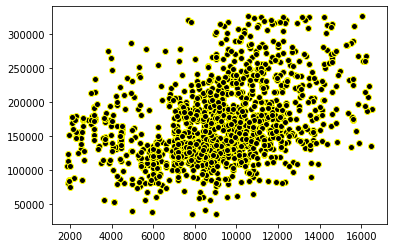

In [239]:
plt.scatter(rent.LotArea,rent.SalePrice,color='Black',edgecolors='Yellow')

In [218]:
plt.scatter.info()

AttributeError: 'function' object has no attribute 'info'